#  SALES PREDICTION USING SIMPLE LINEAR REGRESSION ANALYSIS

### <u> AIM</u>
To construct a Simple linear Regression Model to predict Sales using an appropriate predictor variable.

### <u> DATA SOURCE</u>
 Kaggle

### <u>DATA DESCRIPTION<u>

 An advertising dataset is considered to  analyse the relationship between 'Tv advertising' and 'sales' using a simple linear regression model. <br>
TV Advertising: This variable represents the amount of money spent on TV advertising in dollars for promoting the product. It is the independent variable in the analysis.<br>
Sales: This variable represents the sales figures achieved for the product. It is the dependent variable in the analysis, as it is influenced by the amount spent on TV advertising.

### <u> PROBLEM STATEMENT<u>
Build a model which predicts sales based on the money spent on different platforms for marketing.

### <u>METHODOLOGIES<u>

1. Introduction:
The objective of this analysis is to explore the relationship between advertising spending on TV and resulting product sales. We aim to build a predictive model using simple linear regression to understand how changes in TV advertising expenditure impact sales figures.

2. Understanding the Data
Dataset Overview: The dataset consists of records detailing advertising expenditures across different marketing platforms (TV, newspaper, radio) and corresponding sales figures.<br>
Attributes:<br>
'TV': Amount spent on TV advertising (in dollars).<br>
'Newspaper': Amount spent on newspaper advertising (in dollars).<br>
'Radio': Amount spent on radio advertising (in dollars).<br>
'Sales': Total product sales (in units or dollars).<br><br>
Hypothesis: We hypothesize that there exists a linear relationship between TV advertising spending and sales, with higher expenditures leading to increased sales

3. Simple Linear Regression
Simple linear regression is a statistical method used to model the relationship between two variables: an independent variable (predictor) and a dependent variable (target).Here the target variable is "Sales" and predictor variable is "TV".
Model Equation: The simple linear regression model is represented by<br>
$$ Y =β_0+β_1 x+ε $$
    β0 = The intercept (The value of Y when X is 0)<br>
    β1 = The slope(The change in Y for 1 unit change in X)<br>
    X = Independent varaible<br>
    Y = Dependent Variable<br>
    ε = Random Error<br>
<br>The parameters β0 and β1 are unknown and must be estimated using sample data. Suppose that we have n pairs of data, say (x1,y1) , (x2,y2) , ... , (xn,yn). The estimated for β0 and β1, are given by :<br>
    #### β̂ 1=(∑(𝑥𝑖−𝑥̅ )(𝑦𝑖−𝑦̅ ))/(∑(𝑥𝑖−𝑥̅ )2)=𝑆𝑥𝑦/𝑆𝑥𝑥 
    #### β̂ 0=𝑌̅ −β̂ 1𝑋̅ 
Interval Estimation:
The 100(1-α)% confidence interval is given by:
    #### P[L(X) <= β <= U(X)] = 1-α 
To find the interval estimates, we have 2 cases : when variance is known and when it is not not known.<br>
In the case when the variance is known, the confidence interval is given by
    #### [β̂ 1−𝑧(α⁄2)√(σ2/𝑠𝑥𝑥,)β̂ 1+𝑧(α⁄2)√(σ2/𝑠𝑥𝑥,)] 
In the case when the variance is not known, the confidence interval is given by
    ####  [β̂ 1−𝑡(α⁄2,(𝑛−2))√(σ2/𝑠𝑥𝑥,)β̂ 1+𝑡(α⁄2,(𝑛−2))√(σ2/𝑠𝑥𝑥)] 
where σ̂ 2=𝑆𝑆𝑟𝑒𝑠/(𝑛−2)<br>

4. Model Building:
Data Preparation: Preprocess the dataset by handling missing values and scaling if necessary.
Split Data: Split the dataset into training and testing sets to train and evaluate the model, typically using a 70-30 or 80-20 split.<br>
Model Training: Fit the simple linear regression model to the training data, estimating the intercept and slope coefficients.
Model Interpretation: Interpret the coefficients of the model in the context of the problem, understanding how changes in TV advertising spending affect sales.<br><br>

5. Model Evaluation:
Metrics: Evaluate the performance of the regression model using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared.<br><br>

6. Prediction and Inference:
Predictions: Utilize the trained regression model to make predictions on new or unseen data, providing insights into expected sales figures based on varying levels of TV advertising expenditure.
Inference: Draw conclusions from the model predictions, informing marketing strategies and budget allocation decisions to optimize 
 


sales performance.<br><br>
7. Conclusion:
Summarize the methodologies employed in the analysis, highlighting key steps and findings.

### <u> Reading and understanding data<u>


In [1]:

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#importing data set
df=pd.read_csv("adv.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### <u> Data Inspection<u>

In [3]:
df.shape

(200, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [6]:
df.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


### <u> Data Cleaning<u>

In [7]:
#checking null values
df.isnull().sum()*100/df.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

#### There are no null values in the data set.Hence its clean

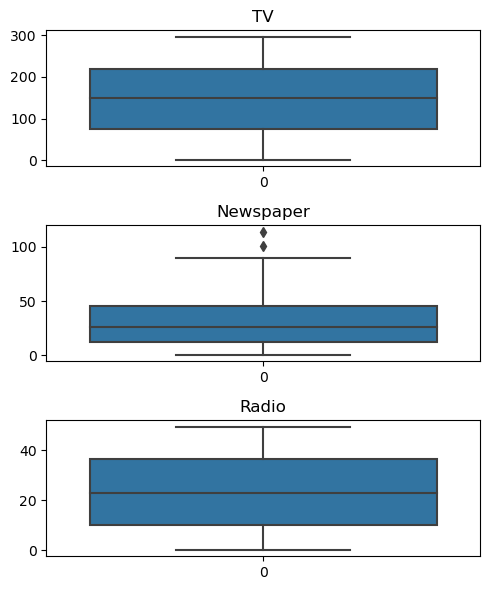

In [8]:
#Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,6))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
axs[0].set_title('TV')
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
axs[1].set_title('Newspaper')
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
axs[2].set_title('Radio')
plt.tight_layout()

#### There are no considerable Outliers present in the data.


## <u>EXPLORATORY DATA ANALYSIS<u>


#### TARGET VARIABLE-SALES

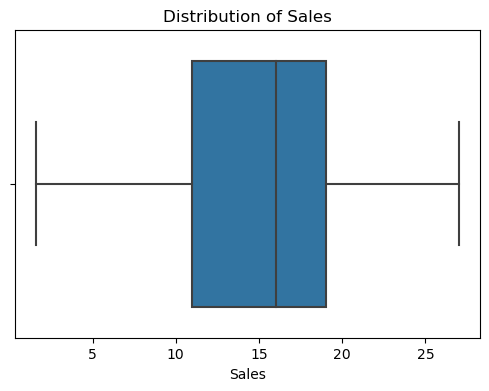

In [9]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Sales', data=df)
plt.title('Distribution of Sales')
plt.show()

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


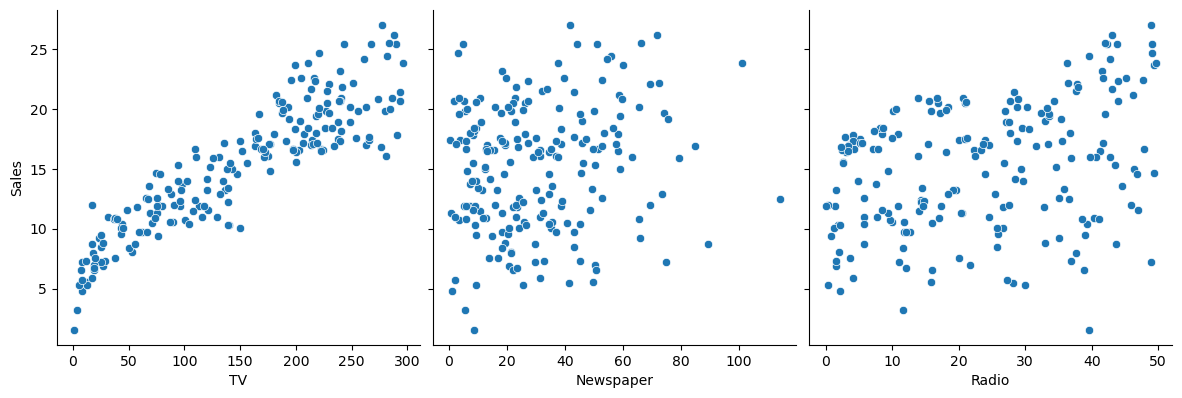

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

In [10]:
# Relation of sales with other variables using scatter plot
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()
plt.figure(figsize=(10,10))

#### since Sales and Tv is having a positive correlation, we will proceed with simple linear regression

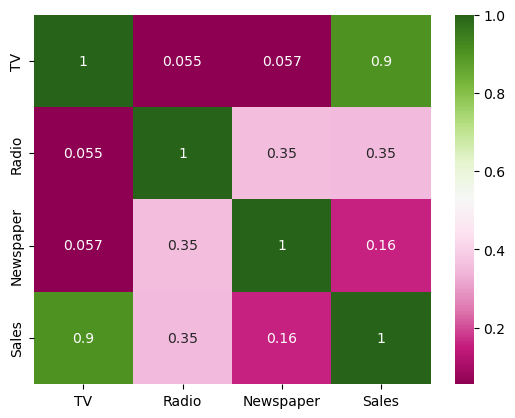

In [11]:
#  correlation between different variables.
sns.heatmap(df.corr(), cmap=("PiYG"), annot = True)
plt.show()

 As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So  simple linear regression will be performed using TV as our feature variable.

## <u>MODEL BUILDING<u>

### Performing Simple Linear Regression
### Equation of linear regression

### 𝑌=β0+βX+ε
 
### β0 = The intercept (The value of Y when X is 0)
### β1 = The slope(The change in Y for 1 unit change in X)
### X = Independent varaible
### Y = Dependent Variable
### ε = Random Error

### In our case:
### Sales=β0+β(TV)+ε


### Generic Steps in model building using statsmodels
 We first assign the feature variable, TV, in this case, to the variable X and the response variable, Sales, to the variable y.

In [12]:
X = df['TV']
y = df['Sales']

### <u>Train-Test Split<u>
Spliting our variable into training and testing sets.This is done by importing
practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [14]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [15]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

### <u>Building a Linear Model<u>
 we need to import the statsmodel.api library using which we will perform the linear regression.



In [16]:
import statsmodels.api as sm


By default, the statsmodels library fits a line on the dataset which passes through the origin. But in order to have an intercept, you need to manually use the add_constant attribute of statsmodels. And once you've added the constant to your X_train dataset, you can go ahead and fit a regression line using the OLS (Ordinary Least Squares) attribute of statsmodels as shown below

### <u>Fitting the regression line using 'OLS'<u>

In [17]:
# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

### <u>Finding the joint estimate( slope and intercept)<u>

In [18]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

## Or 

In [33]:
#coeffecients and intercept 
print("Slope(Coeffecient, beta1:)",model.coef_[0])
print("Intercept, beta 0:",model.intercept_)

NameError: name 'model' is not defined

### <u>Confidence Interval Estimation<u>

In [20]:
confidence_intervals = lr.conf_int()
print("Confidence Intervals:")
print(confidence_intervals)

Confidence Intervals:
              0         1
const  6.188252  7.709114
TV     0.050183  0.058908


In [21]:
# Performing a summary operation lists out all the different parameters of the regression line fitted
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           1.52e-52
Time:                        02:06:00   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

#### The fit is significant .
Let's visualize how well the model fit the data.
From the parameters that we get, our linear regression equation becomes:
#### Sales=6.948+0.054×TV

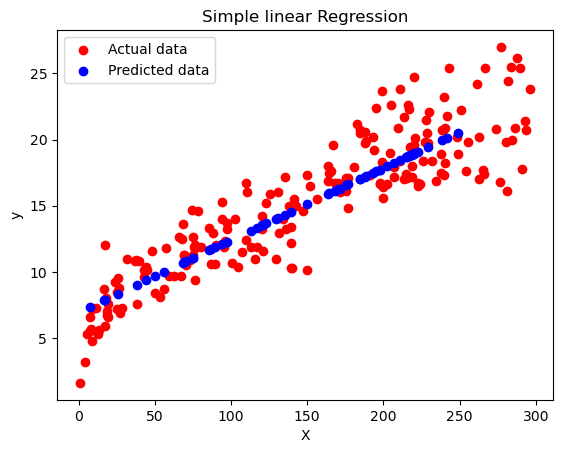

In [34]:
# plotting the data and the regression curve
plt.scatter(X,y,color="red", label="Actual data")
plt.scatter(X_test,y_pred,color='blue',label="Predicted data")
plt.title("Simple linear Regression")
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

### <u>MODEL EVALUATION<u>
##### Residual analysis
To validate assumptions of the model, and hence the reliability for inference

##### Distribution of the error terms
We need to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [23]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

C:\Users\HP\AppData\Local\Temp\ipykernel_25496\4270230627.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res, bins = 15)


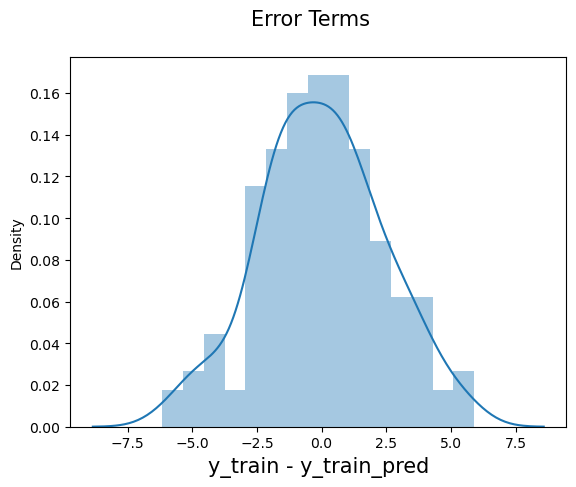

In [24]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15) # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)# X-label
plt.show()

#### The residuals are following the normally distributed with a mean 0. 

### <u> Looking for patterns in the residuals<u>

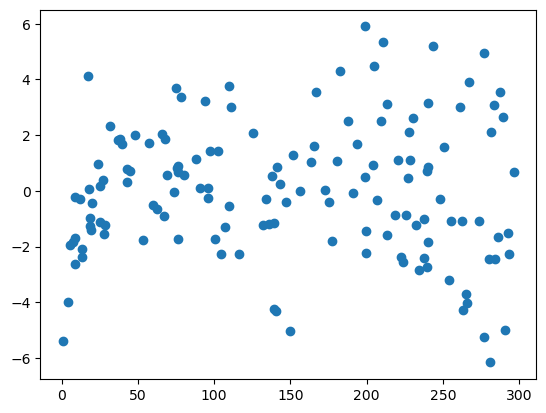

In [25]:
plt.scatter(X_train,res)
plt.show()

We are confident that the model fit isn't by chance, and has decent predictive power. The normality of residual terms allows some inference on the coefficients.

Although, the variance of residuals increasing with X indicates that there is significant variation that this model is unable to explain.

Here the regression line is a pretty good fit to the data.

### <u> Predictions on the test set<u>

We have fitted a regression line on train dataset,now we will make predictions on the test data. For this,first we need to add a constant to the X_test data like we did for X_train and then we can simply go on and predict the y values corresponding to X_test using the predict attribute of the fitted regression line.

In [26]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [27]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [29]:
#Returns the mean squared error; by taking  square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

Inference:Model's predictions deviate from the actual sales values by approximately 2.0193 units.

### <u>Checking R-Squared on the test set<u>

In [30]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

R squared score of 0.7921 indicates that approximately 79.21% of the variance in the target variable (sales) is explained by the independent variable (TV advertising spend) in your regression model. 

### <u>Visualizing the fit on the test set<u>

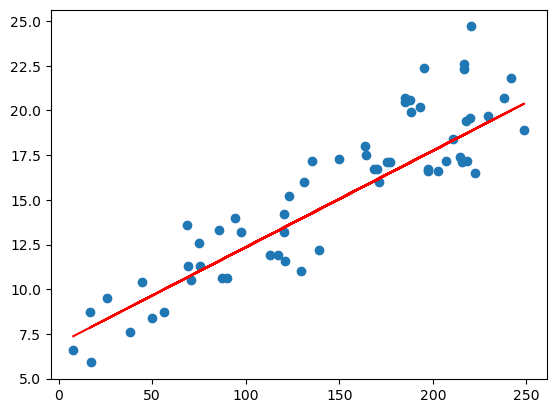

In [31]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

### <u> RESULT:<u>

 The fitted regression line is given by:
 ### Sales=6.948+0.054×TV

### <u>CONCLUSION<u>


The values with which we are concerned are:<br>
   1.The coeffecients and significance(p-value)<br>
   2.R-squared<br>
   3.F statistic and its significance<br>
   4.Confidence intervals of slope and intercept<br>
   
   
<b>The coeffecient for TV is 0.0545, with a very low p vlaue of 0.The coeffecient is statistically significant.So the association is not purely by chance.R -Squared is 0.816,Meaning that 81.6% of the variance in Sales is explained by TV.
This is a decent R-squared value.F statistic has a very low p value (practically low),
Meaning that the model fit is statistically significant, and the explained variance isn't purely by chance.
The slope and intercept is given as 0.0545  and 6.9486.The confidence interval for intercept is given by:(6.188252  7.709114)and the confidence interval for slope is given by: (0.050183  0.058908).


